In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('../data/raw/mitbih_train.csv',header=None)
test_df = pd.read_csv('../data/raw/mitbih_test.csv',header=None)

train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


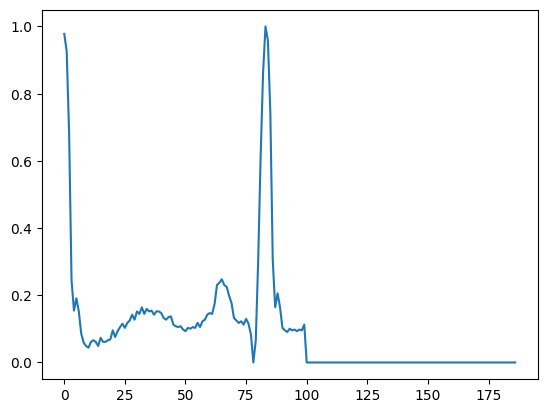

In [3]:
# Plot 1 sample, just to see
plt.plot(train_df.iloc[0,:-1])

train_df shape: (87554, 188)
missing_values_idx (array([], dtype=int64), array([], dtype=int64))
Min values for each signal:
 [0.         0.00363636 0.0037037  0.00381679 0.00416667 0.00438596
 0.00754717 0.00877193 0.01       0.01005025 0.01027397 0.01185771
 0.01192843 0.01234568 0.01265823 0.01414141 0.01476015 0.01568628
 0.01587302 0.01793722 0.01818182 0.01860465 0.01945525 0.02020202
 0.02056555 0.02255639 0.02392345 0.02525252 0.02868852 0.02912621
 0.03111111 0.03187251 0.03212851 0.03214286 0.03650794 0.0375
 0.04       0.04109589 0.04371585 0.04379562 0.04444445 0.04508197
 0.04651163 0.05405406 0.05508475 0.06074766 0.06198347 0.06315789
 0.06637168 0.06802721 0.06837607 0.07009346 0.07106599 0.07142857
 0.07317073 0.07373272 0.08181818 0.08641975 0.09558824 0.09659091
 0.09765625 0.10132159 0.10769231 0.11059908 0.11881188 0.1238938
 0.13278009 0.16129032 0.16568047 0.22981367]
Max values for each signal:
 [0.61432505 0.62578619 0.6461187  0.6512605  0.65454543 0.66937667


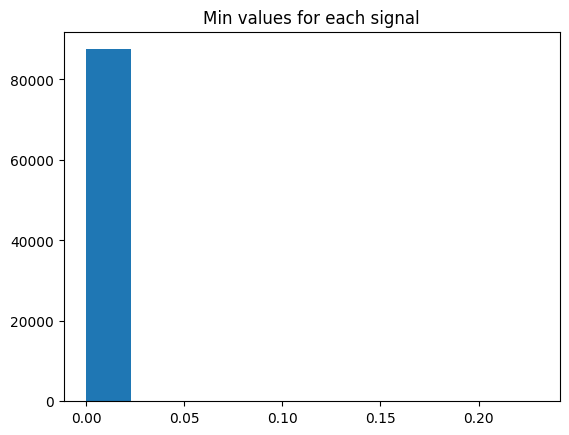

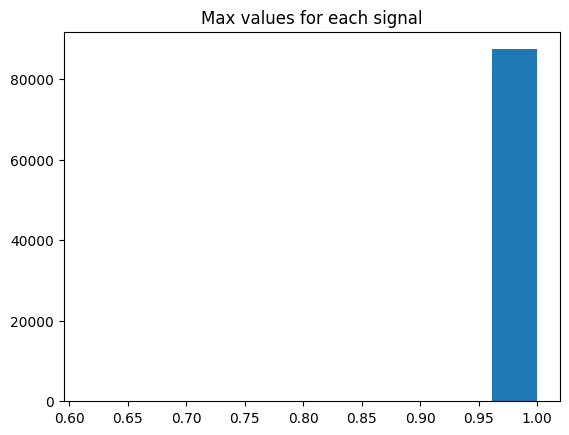

In [4]:
print("train_df shape:", train_df.shape)

# Check for missing values
missing_values_idx = np.where(train_df.isna())
print("missing_values_idx", missing_values_idx)

# Find the min and max value for each signal
min_per_sample = train_df.iloc[:,:-1].min(axis=1)
max_per_sample = train_df.iloc[:,:-1].max(axis=1)

print("Min values for each signal:\n", np.unique(min_per_sample))
print("Max values for each signal:\n", np.unique(max_per_sample))

plt.hist(min_per_sample)
plt.title("Min values for each signal")
plt.show()

plt.clf()
plt.hist(max_per_sample)
plt.title("Max values for each signal")
plt.show()

There are a total of 87554 samples, each with a length of 187.
There are no missing values in the dataframe.
Almost all samples have a minimum value of 0 and a maximum value of 1.

In [5]:
mean_per_signal = train_df.iloc[:,:-1].mean(axis=1).mean()
std_per_signal = train_df.iloc[:,:-1].std(axis=1).mean()

print("Mean per signal: ", mean_per_signal)
print("Std per signal: ", std_per_signal)


Mean per signal:  0.1742829525490637
Std per signal:  0.19352219240418977


Count the number of samples in each class:

In [6]:
label = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

counts_by_class = pd.Series(np.bincount(train_df.iloc[:, -1].astype('int64')), index=label)
print('Counts by class:\n', counts_by_class, '\n')

percent_by_class = counts_by_class / counts_by_class.sum()
print('Percent by class:\n', percent_by_class, '\n')


Counts by class:
 Normal              72471
Supraventricular     2223
Ventricular          5788
Fusion                641
Unknown              6431
dtype: int64 

Percent by class:
 Normal              0.827729
Supraventricular    0.025390
Ventricular         0.066108
Fusion              0.007321
Unknown             0.073452
dtype: float64 



There is heavy class imbalance where there are a lot of normal examples and only a few examples for the other classes.

# Visualize samples from each class
Each row shows ECG samples for one of the classes: Normal (N), Supraventricular (S), Ventricular (V), Fusion (F), and Unknown (Q).
The last column shows 100 samples for the class overlaid on top of each other.

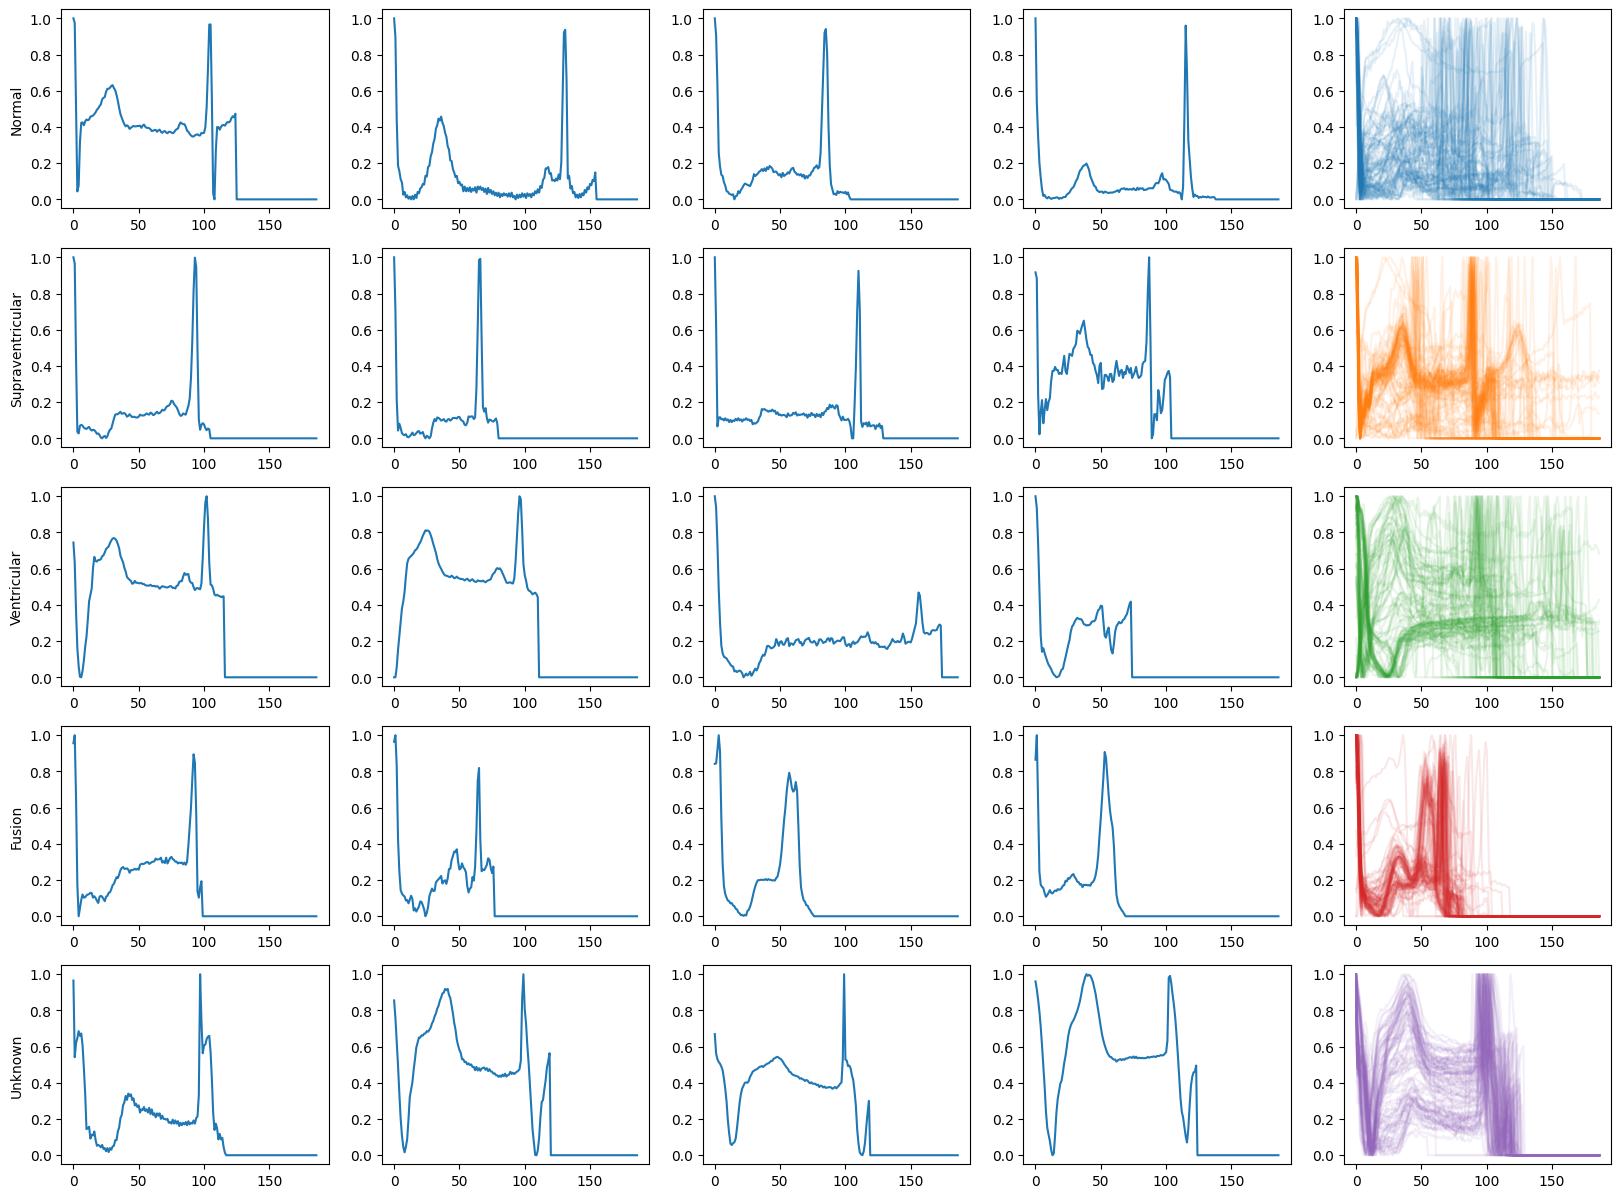

In [7]:
num_classes = 5
num_examples = 4

fig, axes = plt.subplots(num_classes, num_examples + 1, figsize=(20,15))
for c in range(num_classes):
    train_examples = train_df.sample(n=num_examples, weights=train_df.iloc[:, -1] == c)
    for i in range(num_examples):
        axes[c, i].plot(train_examples.iloc[i, :-1])

    train_examples = train_df.sample(n=100, weights=train_df.iloc[:, -1] == c)
    for i in range(100):
        axes[c, -1].plot(train_examples.iloc[i, :-1], color=f'C{c}', alpha=0.1)
    
    axes[c, 0].set_ylabel(label[c])
